TUAZON, FRANCESCA MARIE A. (BCS34)

# Gaussian Filtering

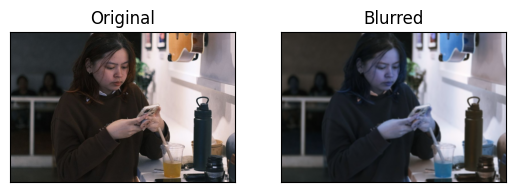

In [28]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img_gaussian = cv.imread('/content/img-1.jpg')
img_rgb = cv.cvtColor(img_gaussian, cv.COLOR_BGR2RGB)

plt.subplot(121), plt.imshow(img_rgb), plt.title('Original')
plt.xticks([]), plt.yticks([])
blur = cv.blur(img_gaussian,(5,5))
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

#### <i>Task 1: Pick a personal photo of you that you think will benefit with the use of gaussian filtering. Show the photo before and after the application of the filter. As a caption, explain why you chose the said photo, and explain how you think the Gaussian Filtering helped the quality of the picture.</i>

I chose this photo due to its high quality, as it was taken by my friend with their DSLR camera. Thus, the blur could be clearly shown. Gaussian filters can be helpful for adjusting the brightness in photos, especially in scenes with harsh lighting conditions. In other words, the filter can potentially even out the lighting and reduce extreme contrasts. Furthermore, it can also help with setting the tone or mood in photographs if we want to invoke a cinematic feel. It could blur the picture and soften details, reducing noise, to create a more stylized look.

# Mean Filtering

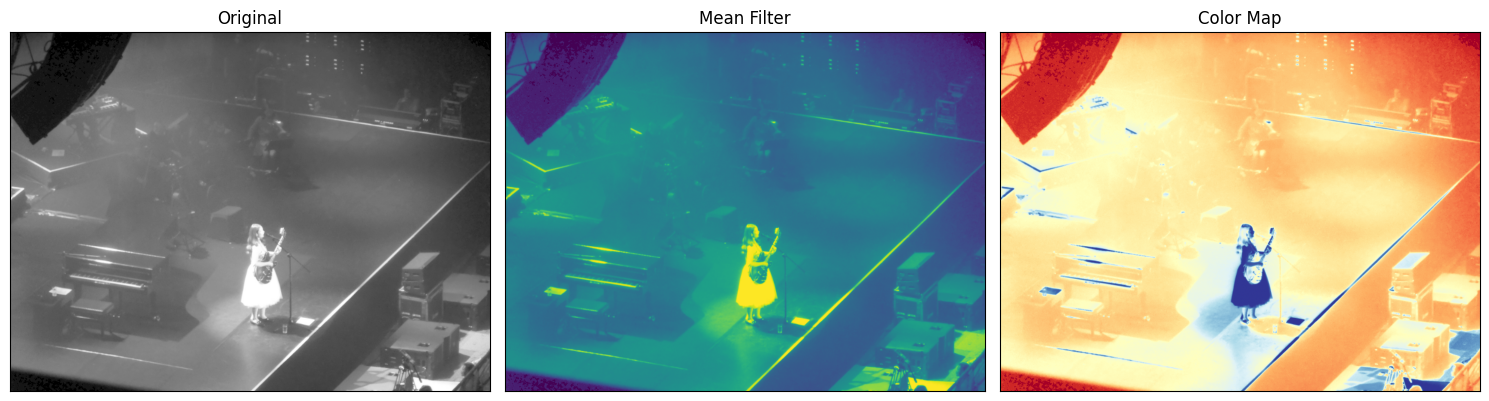

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from sewar import full_ref
from skimage import measure, metrics
from PIL import Image
from google.colab.patches import cv2_imshow
from skimage.metrics import structural_similarity as ssim

img_mean = cv2.imread('img-2.png', 0)
img_rgb = cv2.cvtColor(img_mean, cv2.COLOR_BGR2RGB)

# Create a figure with 1 row and 3 columns for subplots
plt.figure(figsize=(15, 5))  # Adjust figure size as needed

# Column 1: Original Image
plt.subplot(131)  # 1 row, 3 columns, first subplot
plt.imshow(img_rgb)
plt.title('Original')
plt.xticks([])
plt.yticks([])

# Column 2: Mean Filter
plt.subplot(132)
plt.imshow(img_mean)
plt.title('Mean Filter')
plt.xticks([])
plt.yticks([])

# Column 3: Color Map
plt.subplot(133)
img_cmap = img_mean
plt.imshow(img_cmap, cmap='RdYlBu')
plt.title('Color Map')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

<ipython-input-11-bdf0ec30a084>:29: RuntimeWarning: overflow encountered in scalar subtract
  B1, B2 = img[i, j] - zmin, img[i, j] - zmax
<ipython-input-11-bdf0ec30a084>:55: RuntimeWarning: invalid value encountered in cast
  img_out[i, j] = np.mean(trimmed_window)


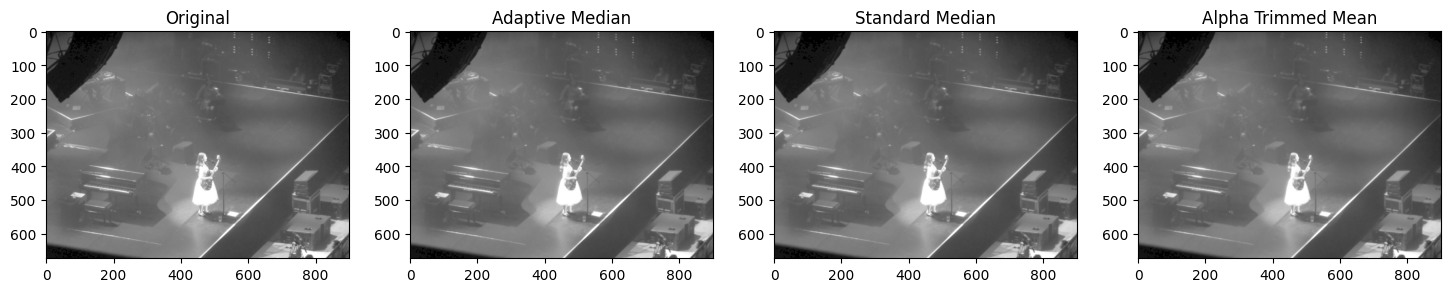

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def median_filter(img, kernel_size=3):
    # Apply standard median filter using OpenCV's medianBlur
    return cv2.medianBlur(img, kernel_size)

def adaptive_median_filter(img, Smax=7):
    h, w = img.shape
    img_out = np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            S = 3  # Initial window size
            while S <= Smax:
                # Define window boundaries
                x1, y1 = max(0, i - S // 2), max(0, j - S // 2)
                x2, y2 = min(h, i + S // 2 + 1), min(w, j + S // 2 + 1)
                window = img[x1:x2, y1:y2]  # Extract window

                # Calculate median, min, and max
                zmed = np.median(window)
                zmin, zmax = window.min(), window.max()

                # Check conditions for adaptive filtering
                A1, A2 = zmed - zmin, zmed - zmax
                B1, B2 = img[i, j] - zmin, img[i, j] - zmax
                if A1 > 0 and A2 < 0 and B1 > 0 and B2 < 0:
                    # Preserve original pixel if conditions are met
                    img_out[i, j] = img[i, j]
                else:
                    # Replace with median otherwise
                    img_out[i, j] = zmed
                    break  # Exit while loop if replacement happens

                S += 2  # Increase window size if necessary
    return img_out

def alpha_trimmed_mean_filter(img, kernel_size=3, d=2):
    h, w = img.shape
    img_out = np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            # Define window boundaries
            x1, y1 = max(0, i - kernel_size // 2), max(0, j - kernel_size // 2)
            x2, y2 = min(h, i + kernel_size // 2 + 1), min(w, j + kernel_size // 2 + 1)
            window = img[x1:x2, y1:y2].flatten()  # Extract window

            # Sort and trim the window values
            trimmed_window = np.sort(window)[d:-d]

            # Calculate mean of the trimmed window
            img_out[i, j] = np.mean(trimmed_window)
    return img_out

# Image files
image_files = ['img-2.png']

for image_file in image_files:
    try:
        img_original = cv2.imread(image_file, 0)  # Load original image

        # Apply filters
        adaptive_filtered_img = adaptive_median_filter(img_original)
        standard_filtered_img = median_filter(img_original)
        alpha_trimmed_img = alpha_trimmed_mean_filter(img_original)

        # Display results
        plt.figure(figsize=(18, 6))  # Increased figure size

        # Display original image
        plt.subplot(141), plt.imshow(img_original, cmap='gray'), plt.title('Original')

        # Display filtered images
        plt.subplot(142), plt.imshow(adaptive_filtered_img, cmap='gray'), plt.title('Adaptive Median')
        plt.subplot(143), plt.imshow(standard_filtered_img, cmap='gray'), plt.title('Standard Median')
        plt.subplot(144), plt.imshow(alpha_trimmed_img, cmap='gray'), plt.title('Alpha Trimmed Mean')

        plt.show()

    except Exception as e:
        print(f"Error processing {image_file}: {e}")

#### <i>Task 2: Under the mean filtering topic. Choose any photo that you think will improve with the use of mean filtering. Show the photo before and after the application of the filter. As a caption, explain how do you think mean filter helped improve the quality of the photo. </i>

This photo, which I took at a Laufey concert last September 2024, presented lighting challenges typical of concert environments. The varied lighting introduced noise and harsh contrasts. Applying a mean filter helped to mitigate this by smoothing out the light variations and creating a more even brightness across the image. This smoothing effect also reduced harsh details, lending a cinematic quality to the photo. Furthermore, adding a color map enhanced the overall aesthetic, reflecting common practices in concert photography to achieve a specific creative vision. Concert photographers often utilize specialized lenses to capture and manipulate lighting effects, further adding to the artistic possibilities.

# Geometric Transformation

<Figure size 1500x500 with 0 Axes>

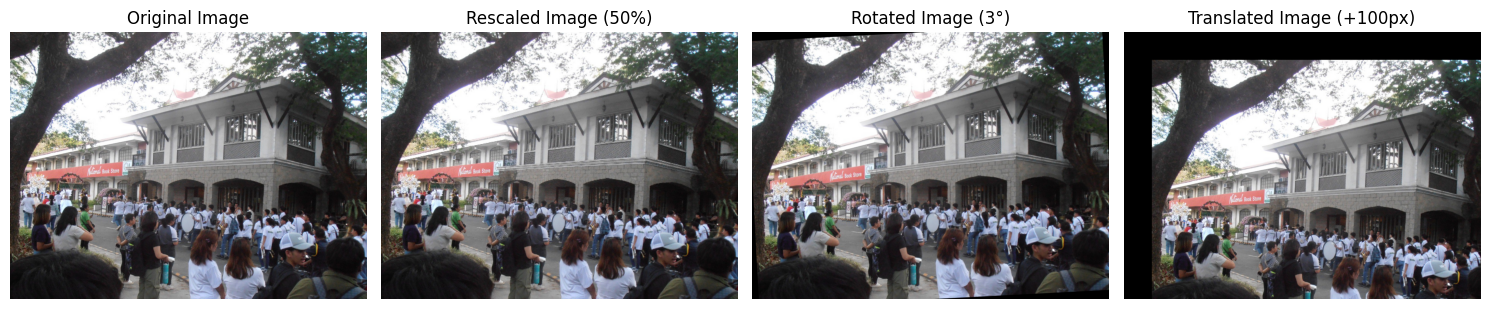

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img_geo = cv2.imread('img-3.jpg')
image_rgb = cv2.cvtColor(img_geo, cv2.COLOR_BGR2RGB)

# Convert the image to HSV
image_hsv = cv2.cvtColor(img_geo, cv2.COLOR_BGR2HSV)

# Plot original, RGB, and HSV images
plt.figure(figsize=(15, 5))

# Scaling: Apply scaling transformation (50% size)
scale_percent = 50  # Scale down by 50%
width = int(img_geo.shape[1] * scale_percent / 100)  # Use img_geo here
height = int(img_geo.shape[0] * scale_percent / 100) # Use img_geo here
dim = (width, height)
rescaled_image = cv2.resize(img_geo, dim)  # Use img_geo here

# Rotation: Rotate the image by 3 degrees
center = (img_geo.shape[1] // 2, img_geo.shape[0] // 2)  # Use img_geo here
rotation_matrix = cv2.getRotationMatrix2D(center, 3, 1.0)  # Rotate by 45 degrees
rotated_image = cv2.warpAffine(img_geo, rotation_matrix, (img_geo.shape[1], img_geo.shape[0]))  # Use img_geo here

# Translation: Move the image 100 pixels in both x and y direction
translation_matrix = np.float32([[1, 0, 100], [0, 1, 100]])  # Translate by (100, 100)
translated_image = cv2.warpAffine(img_geo, translation_matrix, (img_geo.shape[1], img_geo.shape[0]))  # Use img_geo here

# Plot the transformations
plt.figure(figsize=(15, 5))

# Display original image
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img_geo, cv2.COLOR_BGR2RGB))  # Use img_geo here
plt.title('Original Image')
plt.axis('off')

# Display Rescaled image
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(rescaled_image, cv2.COLOR_BGR2RGB))
plt.title('Rescaled Image (50%)')
plt.axis('off')

# Display Rotated image
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image (3°)')
plt.axis('off')

# Display Translated image
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
plt.title('Translated Image (+100px)')
plt.axis('off')

plt.tight_layout()
plt.show()

#### Under the geometric transformation. Choose ANY picture that you think needs correction, using geometric transformation. Show the photo before and after applying the settings. As a caption, explain how you think geometric transformation helped improve the quality of the photo.

The picture I chose is a photo I took during Flores de Mayo last year, when students had a parade within the university as part of a tradition. However, the main correction to take note of is how the original picture is slanted, which I fixed by rotating the image very slightly to straighten it out.

